<a href="https://colab.research.google.com/github/omniaghazy/2/blob/main/DEEP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
data = pd.read_csv('/content/FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


In [30]:
data = data.drop_duplicates()

In [31]:
num = data.select_dtypes(include='number')
num.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244


In [32]:
from tensorflow.keras.utils import to_categorical

data['MODELYEAR'] = to_categorical(data[['MODELYEAR']])

MODELYEAR


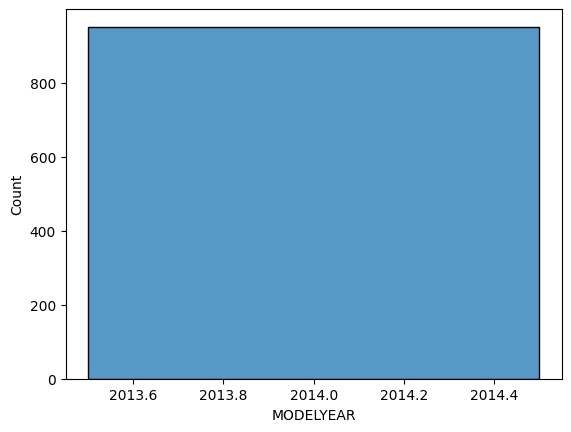

ENGINESIZE


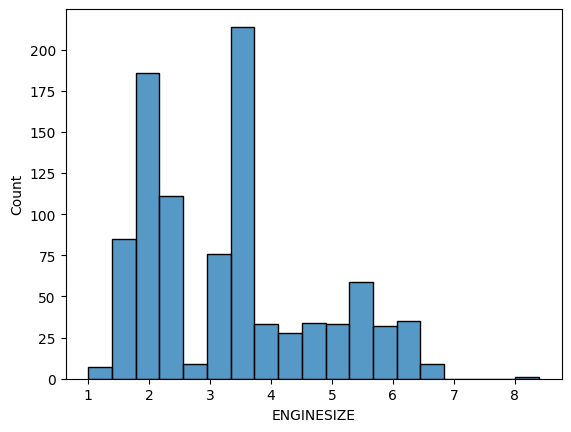

CYLINDERS


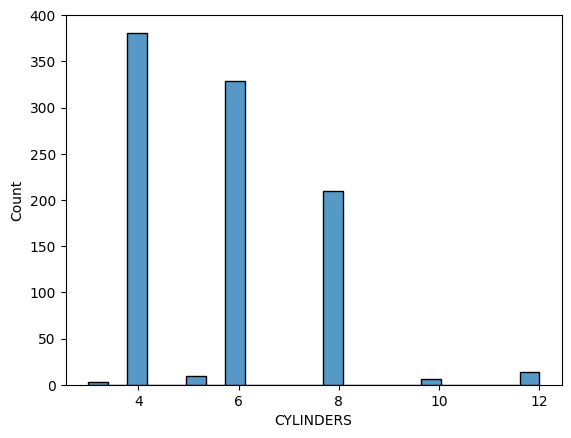

FUELCONSUMPTION_CITY


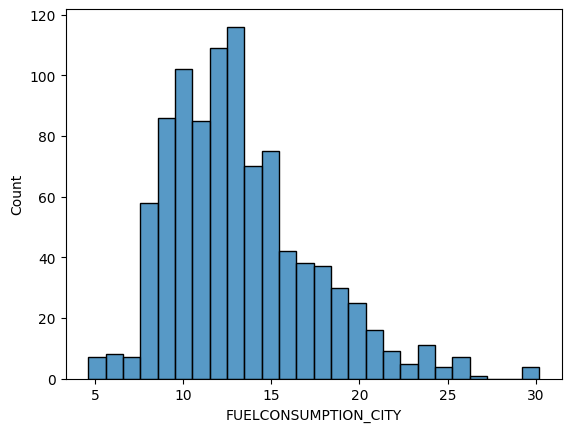

FUELCONSUMPTION_HWY


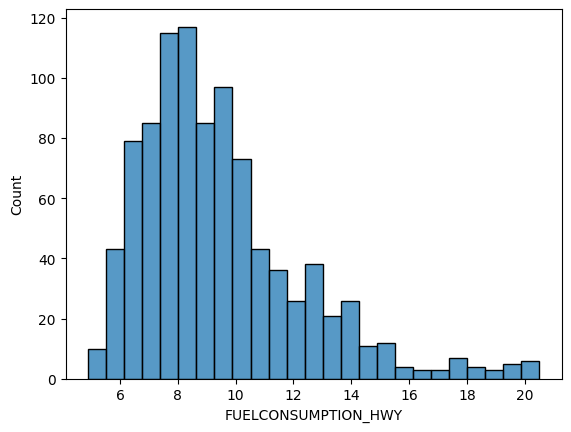

FUELCONSUMPTION_COMB


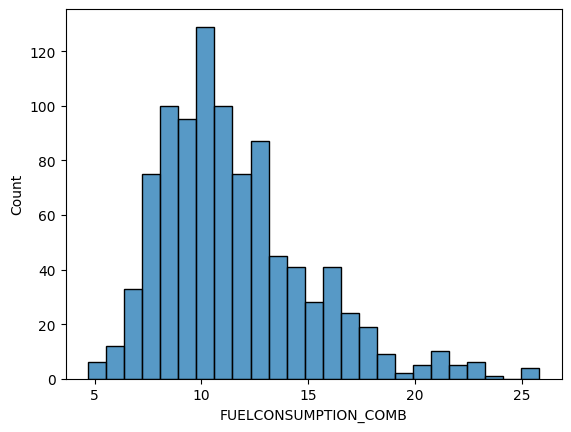

FUELCONSUMPTION_COMB_MPG


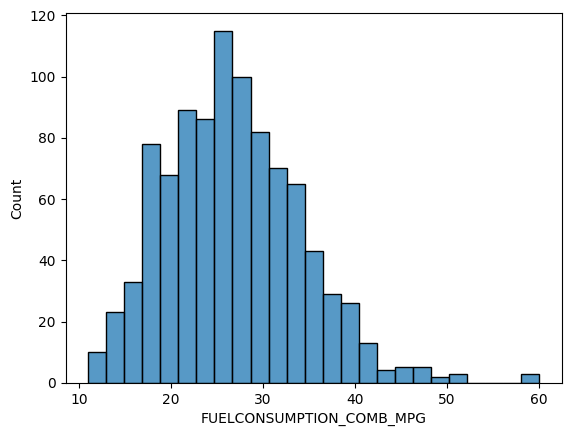

CO2EMISSIONS


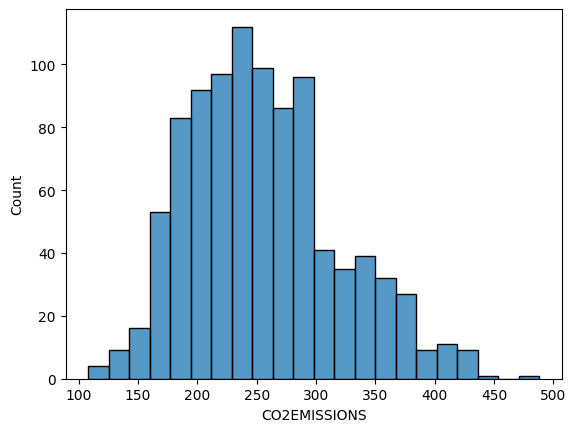

In [33]:
for col in num:
  print(col)
  sns.histplot(num[col])
  plt.show()
  print("="*12)

In [34]:
num.columns

Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [35]:
log= ['FUELCONSUMPTION_CITY' ,'FUELCONSUMPTION_COMB',]
for col in log:
  data[col] = np.log(data[col])

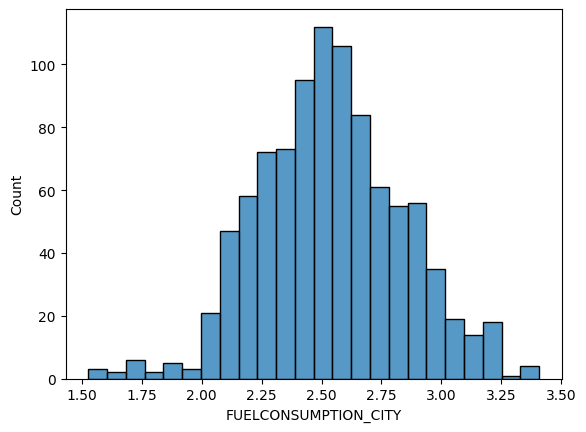

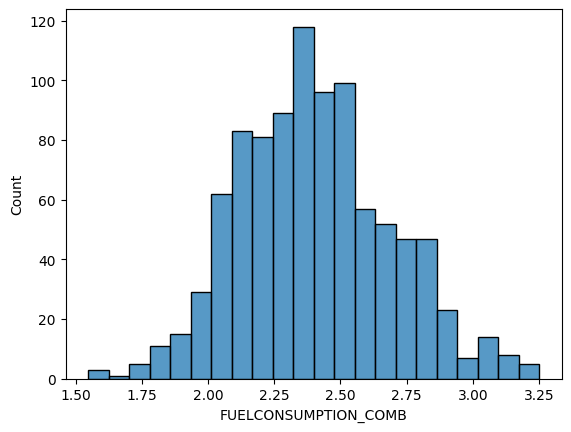

In [36]:
for col in log:
  sns.histplot(data[col])
  plt.show()
  print("="*12)

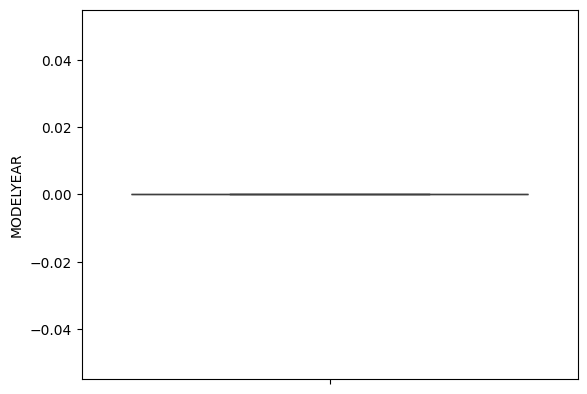

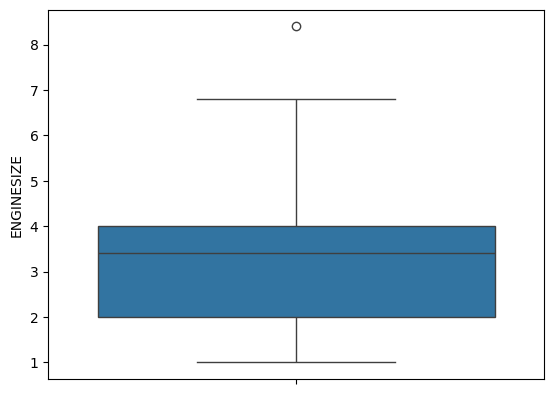

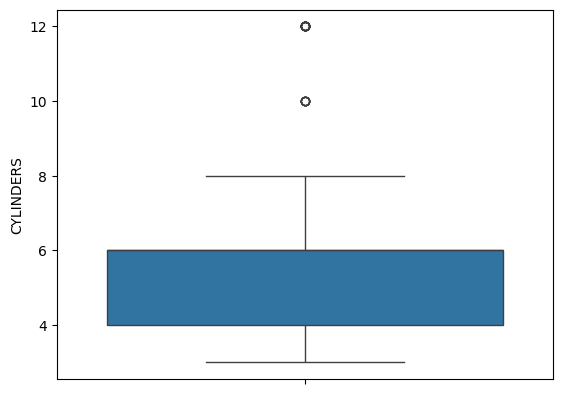

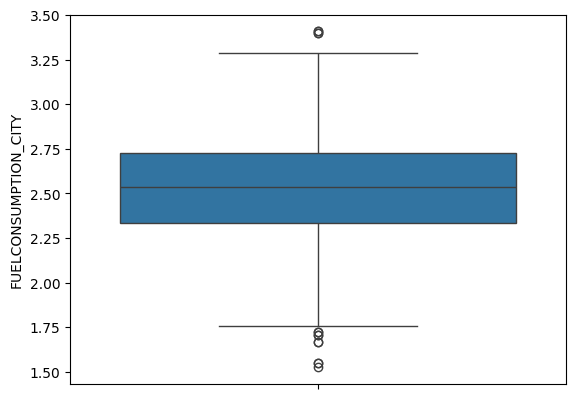

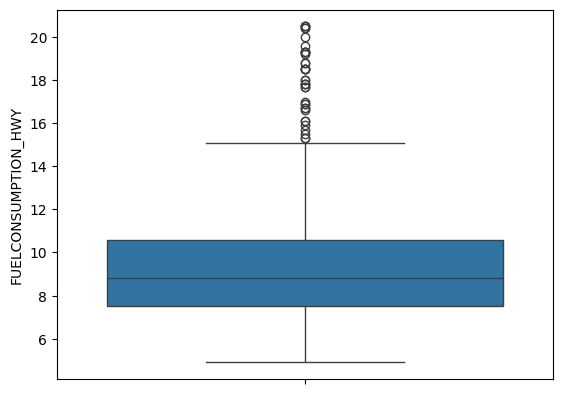

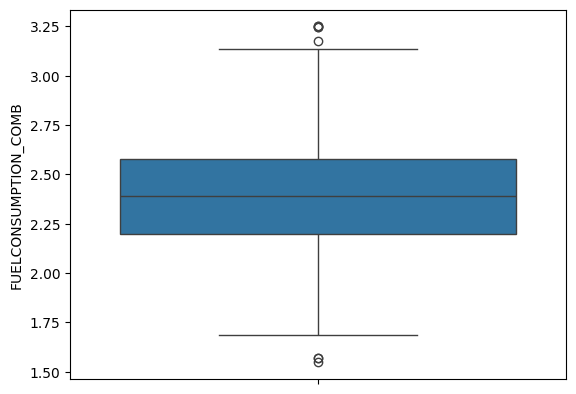

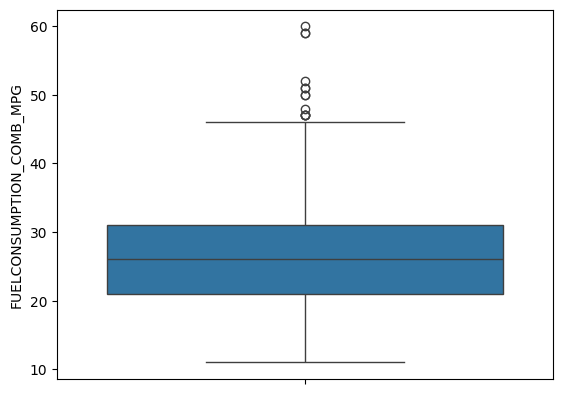

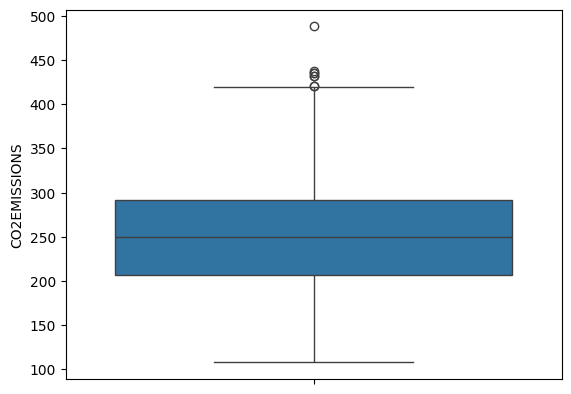

In [37]:
for col in num:
  sns.boxplot(data[col])
  plt.show()
  print("="*12)

In [38]:
cat = data.select_dtypes(include='object')
cat.head()

,Brands,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,COMPACT,AS5,Z
1,ACURA,COMPACT,M6,Z
2,ACURA,COMPACT,AV7,Z
3,ACURA,SUV_SMALL,AS6,Z
4,ACURA,SUV_SMALL,AS6,Z


In [39]:
for col in cat:
  print(col)
  print(cat[col].value_counts())
  print("="*12)

Brands
Brands
FORD             90
CHEVROLET        79
MERCEDES-BENZ    55
TOYOTA           48
BMW              47
VOLKSWAGEN       42
GMC              42
AUDI             41
DODGE            37
PORSCHE          34
KIA              33
NISSAN           33
CADILLAC         30
MAZDA            25
HYUNDAI          24
JEEP             24
SUBARU           23
INFINITI         21
HONDA            21
LEXUS            21
MINI             18
CHRYSLER         17
MITSUBISHI       16
JAGUAR           15
BUICK            15
LAND ROVER       13
RAM              13
ACURA            12
LINCOLN          11
VOLVO            10
SCION             9
BENTLEY           7
ROLLS-ROYCE       6
FIAT              6
MASERATI          5
ASTON MARTIN      4
LAMBORGHINI       3
SRT               1
SMART             1
Name: count, dtype: int64
VEHICLECLASS
VEHICLECLASS
MID_SIZE                   167
COMPACT                    151
SUV_SMALL                  145
SUV_STANDARD                92
FULL_SIZE                   71

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat:
  data[col] = le.fit_transform(data[col])

In [41]:
data

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.0,0,0,2.0,4,10,3,2.292535,6.7,2.140066,33,196
1,0.0,0,0,2.4,4,20,3,2.415914,7.7,2.261763,29,221
2,0.0,0,0,1.5,4,17,3,1.791759,5.8,1.774952,48,136
3,0.0,0,11,3.5,6,11,3,2.541602,9.1,2.406945,25,255
4,0.0,0,11,3.5,6,11,3,2.493205,8.7,2.360854,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0.0,38,11,3.2,6,11,2,2.564949,8.9,2.415914,25,258
1062,0.0,38,11,3.0,6,11,2,2.595255,9.8,2.468100,24,271
1063,0.0,38,11,3.2,6,11,2,2.580217,9.5,2.442347,25,264
1065,0.0,38,11,3.2,6,11,2,2.557227,9.3,2.424803,25,260


In [42]:
data.isna().sum()

,0
MODELYEAR,0
Brands,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0
FUELCONSUMPTION_COMB,0


In [43]:
data

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.0,0,0,2.0,4,10,3,2.292535,6.7,2.140066,33,196
1,0.0,0,0,2.4,4,20,3,2.415914,7.7,2.261763,29,221
2,0.0,0,0,1.5,4,17,3,1.791759,5.8,1.774952,48,136
3,0.0,0,11,3.5,6,11,3,2.541602,9.1,2.406945,25,255
4,0.0,0,11,3.5,6,11,3,2.493205,8.7,2.360854,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0.0,38,11,3.2,6,11,2,2.564949,8.9,2.415914,25,258
1062,0.0,38,11,3.0,6,11,2,2.595255,9.8,2.468100,24,271
1063,0.0,38,11,3.2,6,11,2,2.580217,9.5,2.442347,25,264
1065,0.0,38,11,3.2,6,11,2,2.557227,9.3,2.424803,25,260


In [44]:
from sklearn.model_selection import train_test_split
X = data.drop('CO2EMISSIONS', axis=1)
y = data['CO2EMISSIONS']

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [45]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
for col in x_train.columns:
  if x_train[col].dtype in ['int64', 'float64']: # Only scale numerical columns
    x_train[col] = scaler.fit_transform(x_train[[col]])
    x_test[col] = scaler.transform(x_test[[col]])

In [46]:
x_train.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
512,0.0,-0.052632,0.666667,-0.40,-1.0,-0.818182,0.0,0.000000,0.225806,0.071539,-0.1
502,0.0,-0.052632,-0.555556,-0.80,-1.0,-0.818182,0.0,-0.865616,-0.774194,-0.883375,1.1
300,0.0,-0.315789,-0.333333,1.60,1.0,0.818182,1.0,0.729163,0.548387,0.658872,-0.6
456,0.0,-0.157895,0.000000,1.05,1.0,-0.818182,-1.0,1.096730,1.612903,1.169129,-0.9
315,0.0,-0.315789,-0.333333,-0.40,-1.0,-0.818182,0.0,-0.525799,-0.612903,-0.594748,0.7


In [47]:
# use deeplearning for regression to predict 'CO2EMISSIONS'

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])
print(model.summary())



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 68147.4766 - val_loss: 66842.7109
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 66246.2422 - val_loss: 64414.3320
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64190.5898 - val_loss: 56585.8047
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53566.6172 - val_loss: 38398.4375
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33438.2266 - val_loss: 15344.0752
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12484.0879 - val_loss: 9862.6328
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9098.0322 - val_loss: 7804.7817
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7606.6582 - val_loss: 6494.1523
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5902.0830 - val_loss: 5429.1445
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4856.0024 - val_loss: 4525.5610
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4449.3418 - val_loss: 3783.01

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,717 (139.52 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,812 (93.02 KB)

None


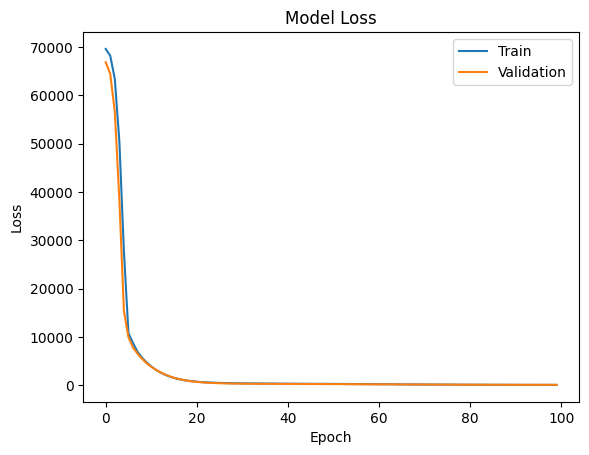

In [48]:
# ACCURACY
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [49]:
# predict
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error: 39.492645263671875
R-squared: 0.988768994808197


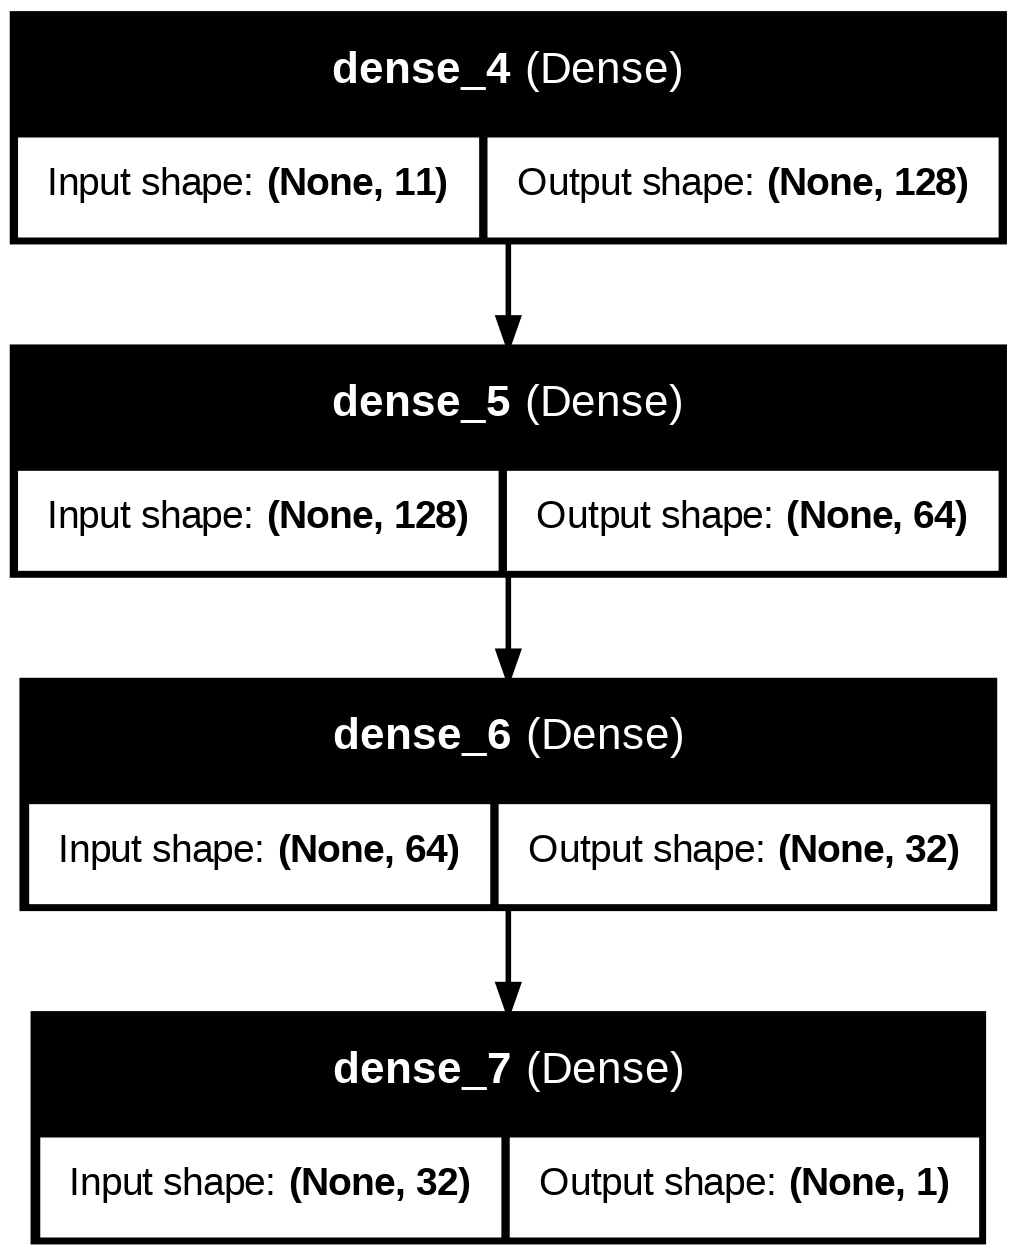

In [55]:
model_visualization = keras.utils.plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

# model nisualisation
from IPython.display import Image
Image(retina=True, filename='model_visualization.png')


In [57]:
print(r2)

0.988768994808197


In [59]:
# save model
import joblib
joblib.dump(model, 'model.pkl')





['model.pkl']